<a href="https://colab.research.google.com/github/yegor-vynokurov/secrets_of_pandas/blob/main/pandas_secrets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Secrets

At work, I ask Google a lot of questions. Some of the answers, so as not to search again, I collect here.



1.   How to read .arff file
2.   How to quickly change to number-categorical values from b'asdf'
3.   How to transform log-normal distribution to normal with np.log
4.   Groupby and cut, qcut for analysis
5.   Give quickly the categorical columns from names
6.   To see the NaNs visually
7.   to convert column of data frame to ohe format
8.   Rolling window, rolling mean, median etc
9.   Load datasets from Kaggle
10.  Set a datetime columns and take only a date or time from DateTime
11.  Function and table for different type of mistakes of model
12.  How to rename columns
13.  Frequenty of xticks on x axis in matplotlib
14.  How to sort values in DF
15.  2D dimension histogram

# How to read .arff file

In [ ]:
from scipy.io import arff
import numpy as np
import pandas as pd
#Load the data using "arff.loadarff" then convert it to dataframe
data = arff.loadarff('/content/drive/MyDrive/Colab Notebooks/cancer/hepatitis.arff')
df = pd.DataFrame(data[0])

# How to load from GoogleDisk

Это ссылка на файл: https://drive.google.com/file/d/1pmGSMI2LuvsiBaBG5v7N8xfPedZbF020/view?usp=sharing

In [ ]:
!gdown --id 1pmGSMI2LuvsiBaBG5v7N8xfPedZbF020

Downloading...
From: https://drive.google.com/uc?id=1pmGSMI2LuvsiBaBG5v7N8xfPedZbF020
To: /content/german-credit.csv
100% 50.5k/50.5k [00:00<00:00, 39.5MB/s]


In [ ]:
df = pd.read_csv('/content/german-credit.csv')

# How to change to number-categorical values from b'asdf'

In [ ]:
df.columns # to see all columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [ ]:
# choose columns when we want to change
cols = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'histology', 'class']

In [ ]:
def changer(cols, df)
  for col in cols:
    print(col) # to see in which columns we work
    for idx, value in enumerate(df[col].unique()):
      print(idx, value) # to see how index corresponds to value
      for i in range(len(df[col].to_numpy())):
        if df.loc[i, col] == value:
          df.loc[i, col] = idx
  return df

# How to transform log-normal distribution to normal with np.log

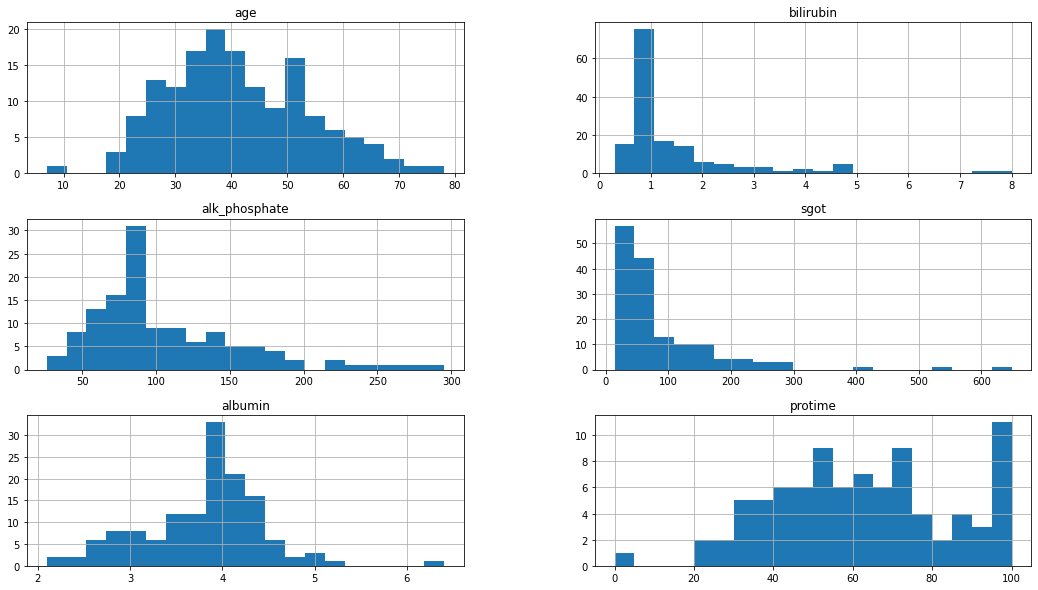

In [ ]:
df.hist(figsize = (18, 10), bins = 20) # see the hists and choose lognormal distribution:
plt.show()

In [ ]:
df.columns # from all columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [ ]:
for c in ['bilirubin', 'alk_phosphate', 'sgot', 'albumin']: # we take lognormals distribution
  df[c] = np.log(df[c]) # apply np.log to all values
  df[c][np.isinf(df[c])] = 0 # if we applied np.log to 0, we have np.inf and change it to 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


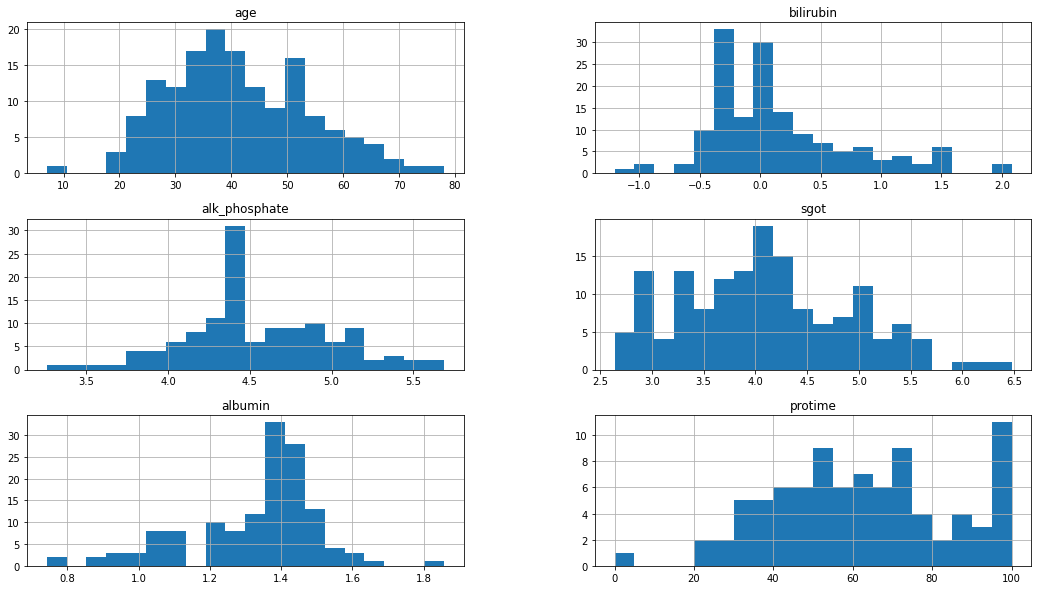

In [ ]:
df.hist(figsize = (18, 10), bins = 20) # see the beautifull normal distributions
plt.show()

# groupby and cut, qcut for analysis

In [ ]:
df.groupby(['class', 'sex'])['sex'].agg(['count', 'mean', 'median'])

count  mean  median
class sex                     
0     0       16   0.0     0.0
      1      107   1.0     1.0
1     1       32   1.0     1.0

в классе "умерли" представлены только мужчины

In [ ]:
df.groupby(['class', 'steroid'])['steroid'].agg(['count', 'mean', 'median'])


count  mean  median
class steroid                     
0     0           56   0.0     0.0
      1           66   1.0     1.0
      2            1   2.0     2.0
1     0           20   0.0     0.0
      1           12   1.0     1.0

неизвестные данные по стероидам есть только для класса "выздоровели". 

In [ ]:
df.groupby(['class'])['steroid'].agg(['count', 'mean', 'median'])


,count,mean,median
class,,,
0,123,0.552846,1.0
1,32,0.375000,0.0


среднее значение стероидов у выздоровевших больше; медиана больше

In [ ]:
df['cut'] = pd.cut(df['age'], 5)

In [ ]:
df.groupby(['cut', 'class'])['class'].agg(['count', 'mean', 'median'])

count  mean  median
cut           class                     
(6.929, 21.2] 0          4   0.0     0.0
              1          0   NaN     NaN
(21.2, 35.4]  0         45   0.0     0.0
              1          5   1.0     1.0
(35.4, 49.6]  0         42   0.0     0.0
              1         16   1.0     1.0
(49.6, 63.8]  0         25   0.0     0.0
              1         10   1.0     1.0
(63.8, 78.0]  0          7   0.0     0.0
              1          1   1.0     1.0

до 21 года смертельных случаев нет

In [ ]:
df['cut2'] = pd.qcut(df['age'], 4)


In [ ]:
df.groupby(['cut2', 'class'])['class'].agg(['count', 'mean', 'median'])


count  mean  median
cut2          class                     
(6.999, 32.0] 0         39   0.0     0.0
              1          2   1.0     1.0
(32.0, 39.0]  0         32   0.0     0.0
              1          7   1.0     1.0
(39.0, 50.0]  0         25   0.0     0.0
              1         13   1.0     1.0
(50.0, 78.0]  0         27   0.0     0.0
              1         10   1.0     1.0

In [ ]:
df.groupby(['cut2'])['class'].agg(['count', 'mean', 'median'])


,count,mean,median
cut2,,,
"(6.999, 32.0]",41,0.048780,0.0
"(32.0, 39.0]",39,0.179487,0.0
"(39.0, 50.0]",38,0.342105,0.0
"(50.0, 78.0]",37,0.270270,0.0


процент умерших больше от 40 до 50

In [ ]:
df['bil2'] = pd.qcut(df['bilirubin'], 4)
df.groupby(['cut2'])['class'].agg(['count', 'mean', 'median'])

,count,mean,median
cut2,,,
"(6.999, 32.0]",41,0.048780,0.0
"(32.0, 39.0]",39,0.179487,0.0
"(39.0, 50.0]",38,0.342105,0.0
"(50.0, 78.0]",37,0.270270,0.0


от 40 до 50 максимальный билирубин

# give the categorical columns from names (get_dummies)
alternate to one hot encoding. Use for machint learning if it is not deep learning

In [ ]:
df  = pd.get_dummies(df, drop_first=True)

# to see the NaNs visually

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))                                             
sns_heatmap = sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='plasma') # visualize of nans
plt.show()

# to convert column of data frame to ohe format ([000100] and # of category)

In [ ]:
def ohe(clmn):
  '''
  take column from pf data frame and transform to 00100000
  input - column
  output - column values in form ohe
  '''
  # for c in db_1['neighbourhood_group'].unique():
  lst = []
  un = clmn.unique() # take unique values
  eye = np.eye(len(un)) # take diag matrix in dimension like len unique values

  clmn_n = clmn.to_numpy() # for more speed
  for cell in clmn_n: # for each cell
    for idx, val in enumerate(un): 
      if cell == val: # if value from cell equal to value from list of unique values
        # print(cell)
        lst.append(eye[idx]) # to temporary list go alternative value
        # print(cell)
      if cell not in un:
        lst.append(np.zeros(len(un))) # for values in test set if they are not in train set
  for indx, vals in enumerate(un):
    print(indx, ' = ',  vals) # print a describe of categories
  return pd.Series(lst)

In [ ]:
def ohe_cat(clmn):
  '''
  take column from pf data frame and transform to number of category
  input - column
  output - column values in form 'mom' = 1, 'cat' = 2 etc
  '''
  # for c in db_1['neighbourhood_group'].unique():
  lst = []
  un = clmn.unique() # take unique values
  # print(un)
  clmn_n = clmn.to_numpy() # for more speed
  # print(clmn_n)
  for cell in clmn_n: # for each cell
    # print(cell)
    for idx, val in enumerate(un): 
      if cell == val: # if value from cell equal to value from list of unique values
        # print(cell)
        lst.append(idx) # to temporary list go alternative categorical value
      if cell not in un:
        lst.append(len(un) + 1) # for values in test set if they are not in train set
  for indx, vals in enumerate(un):
    print(indx, ' = ',  vals) # print a describe of categories
  return pd.Series(lst)

# Rolling window, rolling mean, median etc 
feature engineering time rows



In [ ]:
bitcoin['new_rolling_window'] = bitcoin['rolling_window'].shift(1).rolling(window = 7).mean()
bitcoin['new_rolling_volume'] = bitcoin['rolling_volume'].shift(1).rolling(window = 30).max()
# временные ряды - в новых данных нельзя учитывать текущий день. Поэтому = shift(1)

In [ ]:
# цена close на day дней назад - дополнительные признаки
for day in range(1,8):
  bitcoin[f'close_{day}d'] = bitcoin['close'].shift(day)

In [ ]:
bitcoin.data.dt.weekday # извлечь день недели, месяц и т.д.

In [ ]:
bitcoin['target'] = bitcoin['close'].shift(-1)
# Y - цена close следующего дня, сдвигаем на -1

In [ ]:
(y_pred - y_test).abs().hist() # график ошибки

In [ ]:
pd.DataFrame(data = [model.feature_importance_], columns = X.columns).T.sort_values(0, ascending = False)
# признаки в порядке важности

# Load datasets from Kaggle

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# !mkdir -p ~/.kaggle

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle_derby/kaggle.json' ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c big-data-derby-2022 -f nyra_race_table.csv

nyra_race_table.csv: Skipping, found more recently modified local copy (use --force to force download)


# set a datetime columns from value as 512 to 17:12
and take only a date or only a time from DateTime format of column

In [ ]:
# convert time in format 150 in format 13:50
def form(val):
  val = str(val)
  if len(val) == 3:
    val_last = val[1:]
    val_first = str(12 + int(val[:1]))
    val = val_first + val_last
  val = val[:2] + ':' + val[2:]
  return val

In [ ]:
df['race_date_2'] = pd.to_datetime(df['race_date'])

In [ ]:
df['time'] = df['post_time'].apply(form) # convert all times in new format

In [ ]:
df['time'] = pd.to_datetime(df.time, format="%H:%M").dt.time # dt.date take only date

In [ ]:
df['time_str'] = df['post_time'].apply(form) # convert all times in new format
df['time_str'] = pd.to_datetime(df.time_str, format="%H:%M").dt.hour.astype(str) # dt.date take only date

In [ ]:
df

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,race_date_2,time,time_str
0,AQU,2019-01-01,1,650,D,MY,36,AOC,80000,1220,2019-01-01,12:20:00,12
1,AQU,2019-01-01,2,600,D,MY,48,MCL,41000,1250,2019-01-01,12:50:00,12
2,AQU,2019-01-01,3,550,D,MY,54,MCL,35000,121,2019-01-01,13:21:00,13
3,AQU,2019-01-01,4,900,D,MY,101,AOC,80000,150,2019-01-01,13:50:00,13
4,AQU,2019-01-01,5,700,D,MY,60,ALW,64000,220,2019-01-01,14:20:00,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,SAR,2019-09-02,7,900,D,SY,79,CLM,48000,356,2019-09-02,15:56:00,15
1996,SAR,2019-09-02,8,700,D,SY,32,AOC,83000,433,2019-09-02,16:33:00,16
1997,SAR,2019-09-02,9,850,I,SF,22,STK,250000,507,2019-09-02,17:07:00,17
1998,SAR,2019-09-02,10,700,D,SY,32,STK,350000,540,2019-09-02,17:40:00,17


In [ ]:
df['data_time'] = df['race_date_2'] + pd.to_timedelta(df['time'].astype(str))
# create a data-time column

In [ ]:
df['month'] = df['race_date_2'].dt.month

In [ ]:
df['dayofweek'] = df['race_date_2'].dt.dayofweek

# Function and table for different type of mistakes of model

In [ ]:
# error in a percent MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def dataframe_metrics(y_test, y_pred):
  stats = [metrics.mean_absolute_error(y_test, y_pred),
           np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
           metrics.r2_score(y_test, y_pred),
           mean_absolute_percentage_error(y_test, y_pred)      
  ]
  return stats
measured_metrics = pd.DataFrame({'error_type': ['MAE', 'RMSE', 'R2', 'MAPE']})
measured_metrics.set_index('error_type')

""
error_type
MAE
RMSE
R2
MAPE


In [ ]:
y_median = np.median(y_test)
y_pred_naive = np.ones(len(y_test)) * y_median
# baseline of prediction - only a median

In [ ]:
measured_metrics['naive'] = dataframe_metrics(y_test-1, y_pred_naive-1)
measured_metrics
# naive prediction based median and it errors

,error_type,naive
0,MAE,37533.666667
1,RMSE,106334.610546
2,R2,-0.034274
3,MAPE,40.145293


In [ ]:
measured_metrics['des_tree_poisson'] = dataframe_metrics(y_test-1, y_pred-1)
measured_metrics
# different models evaluating errors

,error_type,naive,des_tree,des_tree_mse,des_tree_mae,des_tree_poisson
0,MAE,37533.666667,32573.887486,41126.455821,41605.869600,33924.873051
1,RMSE,106334.610546,64186.733393,95618.464668,95970.535455,71255.506787
2,R2,-0.034274,0.623143,0.163685,0.157515,0.535567
3,MAPE,40.145293,48.558852,58.655791,56.977166,48.546848


# Rename of columns manually and by function

In [ ]:
df.columns # list of existing columns

Index(['AQU', '2019-01-01', '1', '1  ', '123', 'Dylan Davis', '130', '2'], dtype='object')

In [ ]:
df.columns = ['track_id', 'race_date', 'race_number', 'program_number', 'weight_carried', 'jockey',
       'odds', 'position_at_finish']

# names of new columns

In [ ]:
# df.columns = df.columns.str.replace(' ','_').str.lower()
# change big letters and whitespaces to lower and _

In [ ]:
df = df.rename(columns = {'Year': 'race_year'})

# Frequenty of xticks on x axis in matplotlib

## Frequenty of dates

In [ ]:
df['race_date_2'] = pd.to_datetime(df['race_date'])

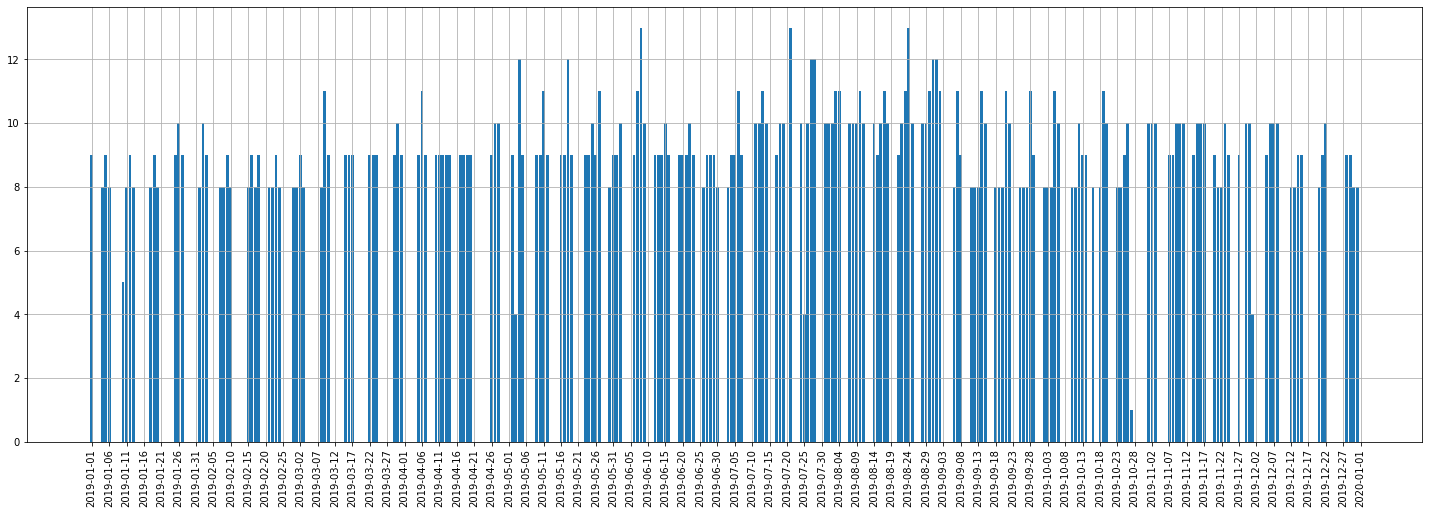

In [ ]:
plt.figure(figsize = (25,8))
plt.bar(df.race_date_2.value_counts().index, df.race_date_2.value_counts())
plt.xticks(np.arange(df.race_date_2.value_counts().index.min(), # from min 
                     df.race_date_2.value_counts().index.max() + pd.Timedelta(5, unit='D'), # to max + reserve of some days
                     pd.Timedelta(5, unit='D')), rotation = 90)
plt.grid()
plt.show()

## Frequency of values

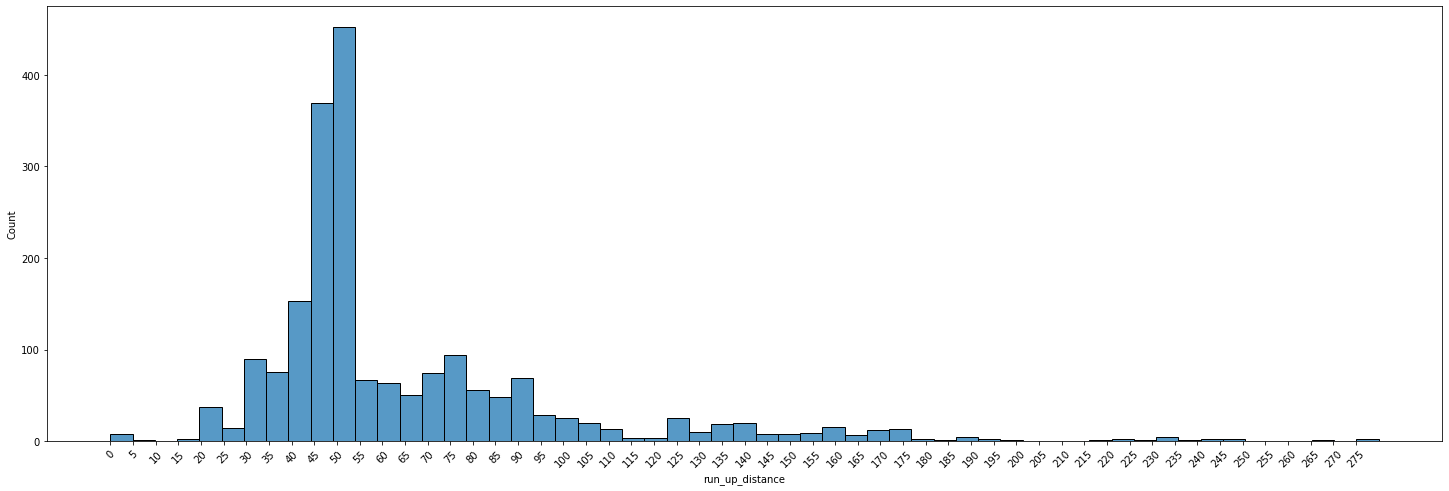

In [ ]:
plt.figure(figsize = (25,8))
sns.histplot(df.run_up_distance)
plt.xticks(np.arange(0,df.run_up_distance.max(), 5), rotation = 45)
plt.show()

# How to sort values in DF

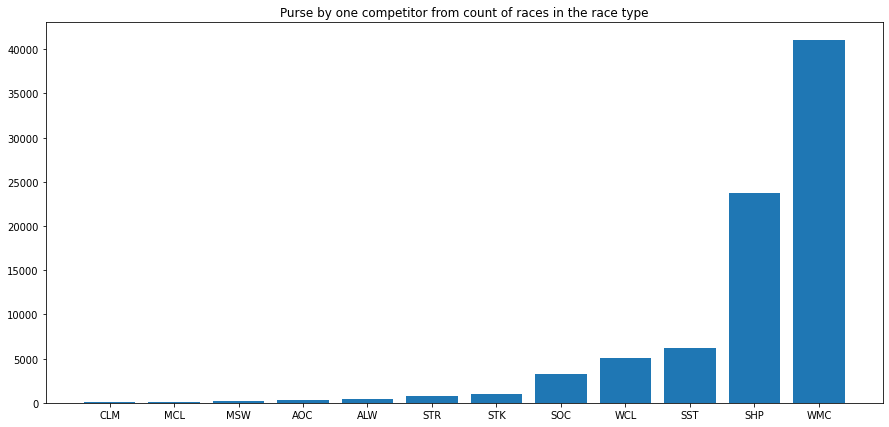

In [ ]:
plt.figure(figsize = (15,7))
plt.bar(purse_race_type.sort_values(by = 'mean_rate').index, purse_race_type.sort_values(by = 'mean_rate')['mean_rate'])
# plt.plot(purse_race_type.index, purse_race_type['rate'])
plt.title('Purse by one competitor from count of races in the race type')
plt.show()

# How to arrange of groupby datas in a color

In [ ]:
(df.groupby(['checking_account'])['default']
.agg(['count', 'mean'])
.sort_values('count',ascending=False)
.style
.format({
    'mean': '{:,.1%}'.format,
})
.applymap(
     lambda x: 'background-color : green' if x>0.3 else '', 
     subset=['mean']))

,count,mean
checking_account,,
no_info,394,11.7%
little,274,49.3%
moderate,269,39.0%
rich,63,22.2%


# 2D dimension histogram

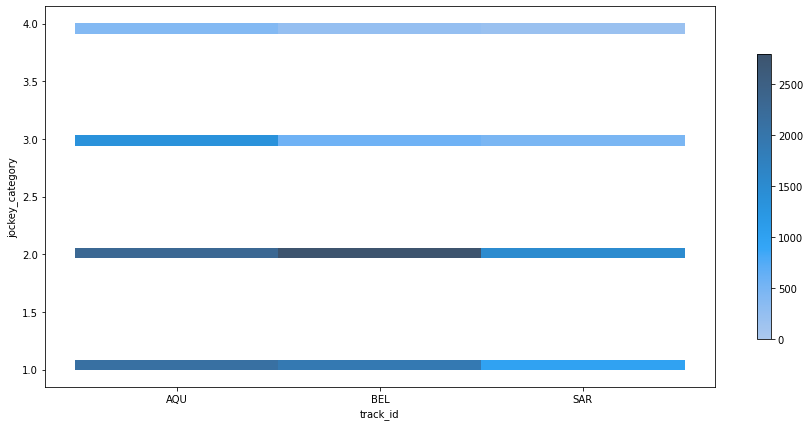

In [ ]:
plt.figure(figsize = (15,7))
sns.histplot(df, x = 'track_id', y = 'jockey_category', cbar=True, cbar_kws=dict(shrink=.75))
plt.show()

# Analogue of pivot table from groupby

In [ ]:
df[(df['odds'] > 11500) & (df['odds'] < 20000)].groupby(['position_at_finish', 'jockey_category'])[['odds']].count()

odds
position_at_finish jockey_category      
2                  3                   1
                   4                   1
4                  2                   1
5                  1                   1
                   2                   1
                   4                   1
6                  2                   1
                   3                   1
7                  2                   1
                   3                   2
                   4                   3
8                  3                   6
                   4                   2
9                  3                   4
                   4                   4
10                 2                   2
                   3                   6
                   4                   2
11                 2                   1
                   3                   4
                   4                   1
12                 2                   2
                   3                   4
                   4                   1

In [ ]:
# transpone jockey category from index to columns
df[(df['odds'] > 11500) & (df['odds'] < 20000)].groupby(['position_at_finish', 'jockey_category'])[['odds']].count().unstack()

odds               
jockey_category       1    2    3    4
position_at_finish                    
2                   NaN  NaN  1.0  1.0
4                   NaN  1.0  NaN  NaN
5                   1.0  1.0  NaN  1.0
6                   NaN  1.0  1.0  NaN
7                   NaN  1.0  2.0  3.0
8                   NaN  NaN  6.0  2.0
9                   NaN  NaN  4.0  4.0
10                  NaN  2.0  6.0  2.0
11                  NaN  1.0  4.0  1.0
12                  NaN  2.0  4.0  1.0

# To add column with percentages to pivot table

In [ ]:
p = df[(df['odds'] > 4500) & (df['odds'] < 11500)].pivot_table(index=['position_at_finish', 'jockey_category'],
              #  columns='jockey_category',
               values=['odds'],
               aggfunc=['count', 'median'],
               fill_value=0,
               margins=True)


In [ ]:
p

count   median
                                    odds     odds
position_at_finish jockey_category               
1                  2                   2   5937.5
                   3                   3   6425.0
                   4                   2   6275.0
2                  1                   1   6425.0
                   2                   7   5050.0
                   3                  12   5862.5
                   4                   1   6825.0
3                  1                   6   4737.5
                   2                  15   5225.0
                   3                  13   6025.0
                   4                   6   5400.0
4                  1                   6   5262.5
                   2                  28   5412.5
                   3                  31   5775.0
                   4                   6   6175.0
5                  1                  10   5212.5
                   2                  36   5650.0
                   3                  48   5925.0
                   4                  20   5850.0
6                  1                  19   5625.0
                   2                  57   5475.0
                   3                  71   6375.0
                   4                  25   5775.0
7                  1                  18   5200.0
                   2                  59   6000.0
                   3                  71   6000.0
                   4                  39   6550.0
8                  1                  12   5850.0
                   2                  57   5950.0
                   3                  77   6925.0
                   4                  33   6975.0
9                  1                  16   5987.5
                   2                  55   6800.0
                   3                  50   7062.5
                   4                  22   7150.0
10                 1                  12   6000.0
                   2                  33   6400.0
                   3                  35   6875.0
                   4                  13   8625.0
11                 1                   2   6800.0
                   2                  18   7837.5
                   3                  26   8400.0
                   4                   5   7675.0
12                 1                   3   5875.0
                   2                  15   8050.0
                   3                  19   8450.0
                   4                   6   8662.5
13                 1                   1   5475.0
                   3                   1   9100.0
                   4                   1  10750.0
All                                 1124   6175.0

In [ ]:
# set the column with percentage
for i, row in p.iterrows():
  p.loc[i, 'percent'] = (p.loc[i, 'count'] / p.loc['All', 'count']).to_numpy()[0][0]

# How to set a colormap to dataframe

In [ ]:
p[:-1].style.background_gradient(cmap='Blues')

# How to set difference column between first and second value etc

In [ ]:
# np.diff make difference, but not same dimension. np.insert add zero (third position) to 0 index (second position)
df['diff_lat'] = np.insert(np.diff(df.latitude), 0, 0)

In [ ]:
# native function: 
c['diff_lat'] = c['latitude'].diff().fillna(0)

In [ ]:
# percentage change from value to value
c['diff_lat_perc'] = c['latitude'].pct_change()

# How to save a large dataset

In [ ]:
df.to_pickle('df.pickle')
df.to_feather('df.feather')
df.to_parquet('df.parquet')

# How to change str-type of column to categorical
to speed up a calculation in dataframe

In [ ]:
df['diff'] = df['diff'].astype('category')